In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluation
from sklearn.model_selection import GridSearchCV

In [22]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') # Reads the csv dataset
display(df) # displays a preview of the dataset
print(df.isnull().sum())  # Shows the number of missing values per column
df.describe() # Gives statistical summaries of each feature

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


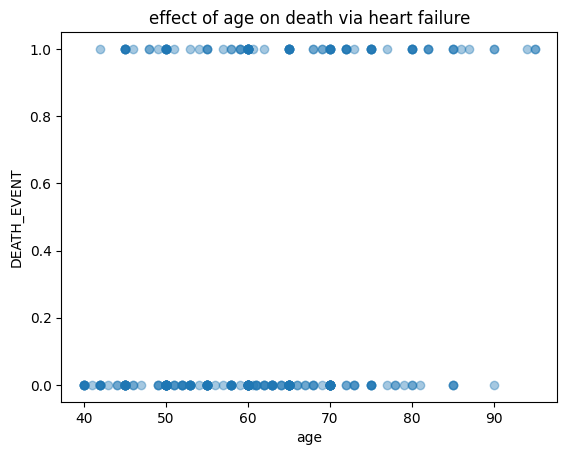

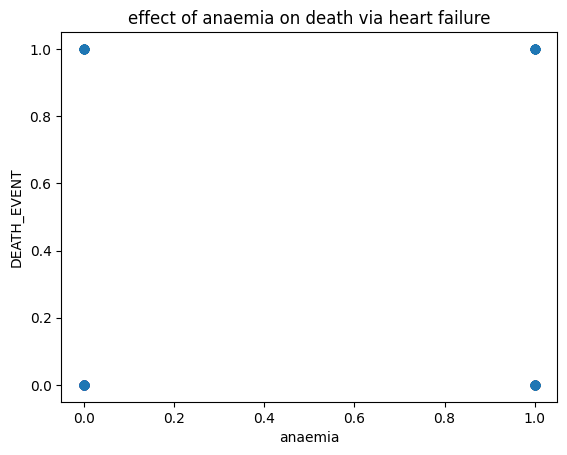

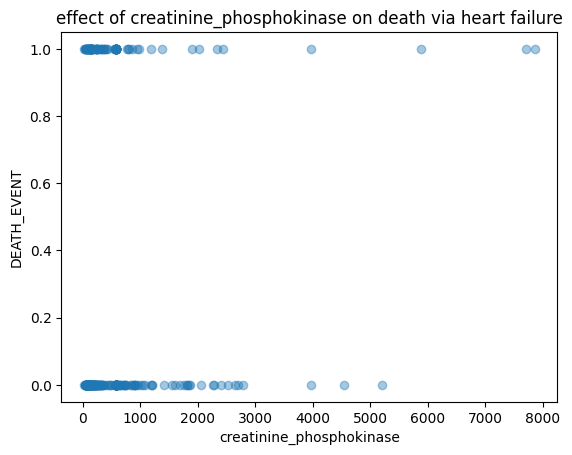

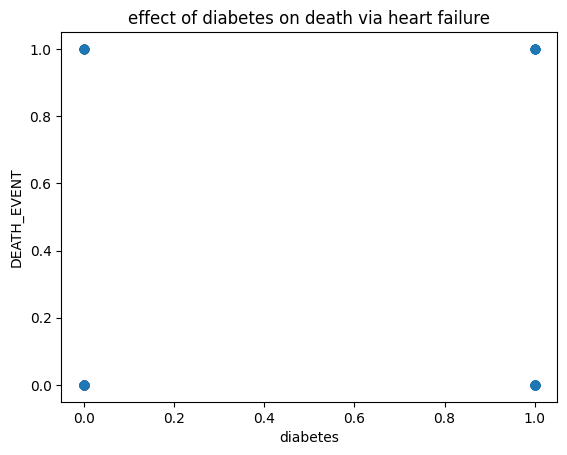

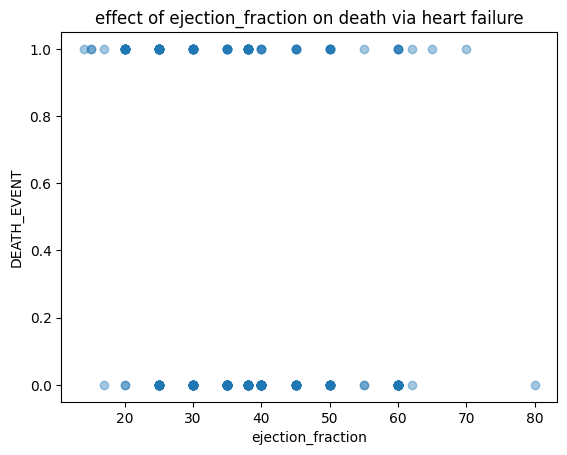

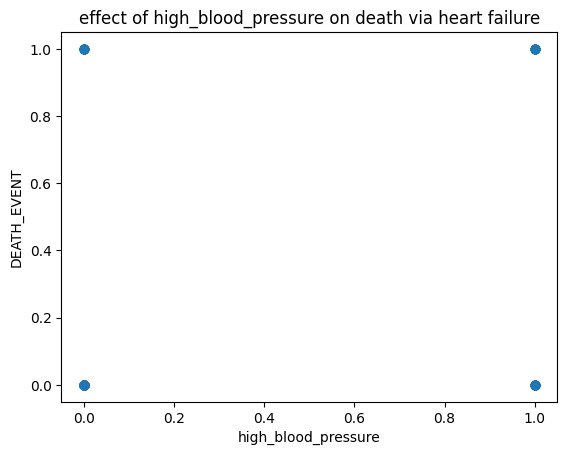

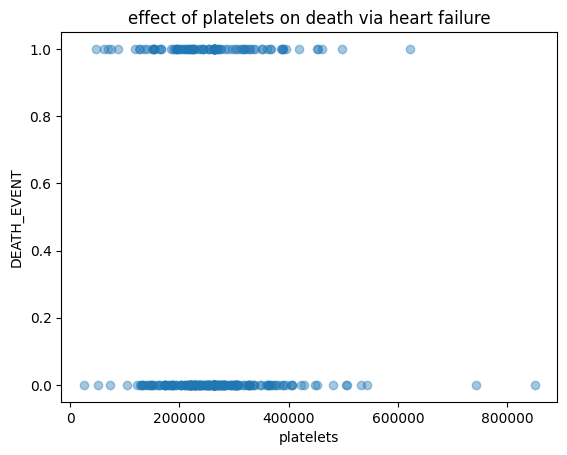

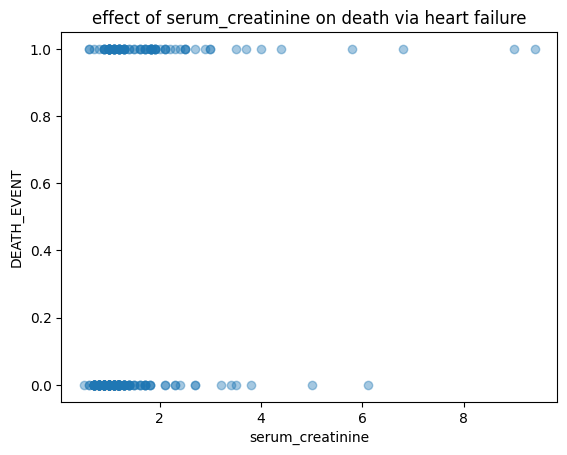

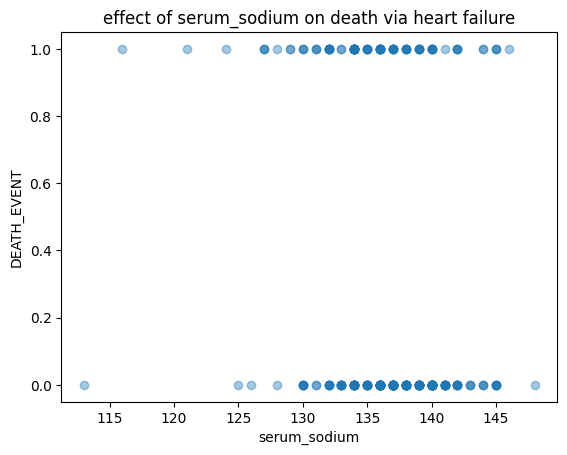

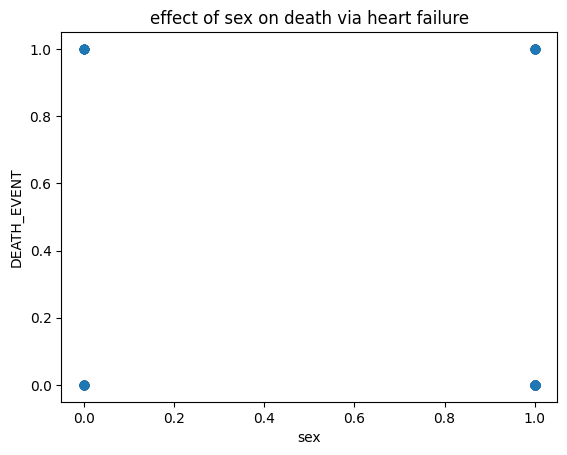

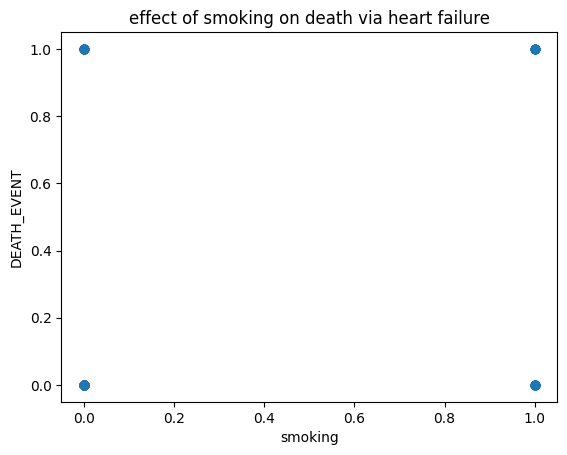

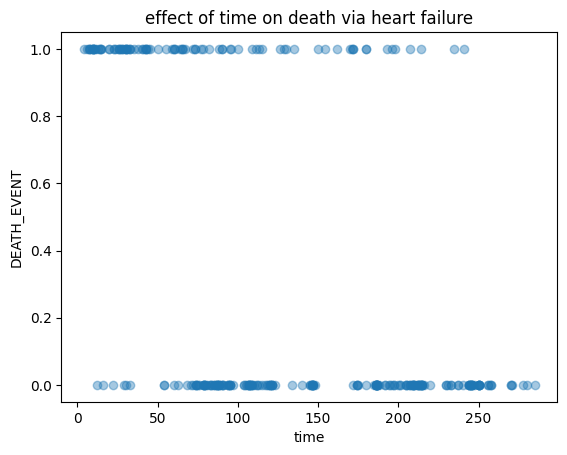

In [23]:
# Makes a scatterplot of each feature against the response variable (DEATH_EVENT)
for column in df.columns:
    if column == 'DEATH_EVENT':
        continue
    plt.scatter(df[f'{column}'], df['DEATH_EVENT'], alpha = 0.4)
    plt.title(f'effect of {column} on death via heart failure')
    plt.xlabel(f'{column}')
    plt.ylabel('DEATH_EVENT')
    plt.show()

In [30]:
X = df.drop(columns = ['DEATH_EVENT']) # List of all features
y = df['DEATH_EVENT'] # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Initialize and train the model (Ridge regularization)
model = LogisticRegression(penalty='l2', solver = 'liblinear')
model.fit(X_train_scaled, y_train)

# Use trained model to predict class on the test set
y_pred = model.predict(X_test_scaled)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8167
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



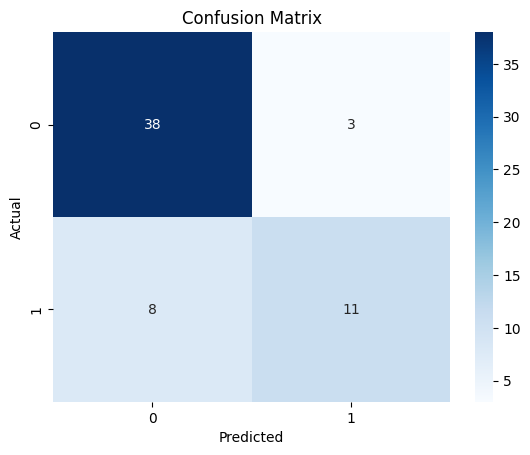

In [29]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#confusion matrix interptation: 

In [7]:
# Check feature coefficients
coefficients = model.coef_
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients[0]})

# Sort by absolute coefficient values (importance)
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending = False).index)

print(coef_df.to_string(index=False))

                 Feature  Coefficient
                    time    -1.546811
       ejection_fraction    -0.894632
        serum_creatinine     0.780842
                     age     0.411463
creatinine_phosphokinase     0.274768
                diabetes     0.238141
                     sex    -0.196557
               platelets    -0.135119
            serum_sodium    -0.134993
                 smoking     0.108397
                 anaemia     0.089910
     high_blood_pressure     0.047595


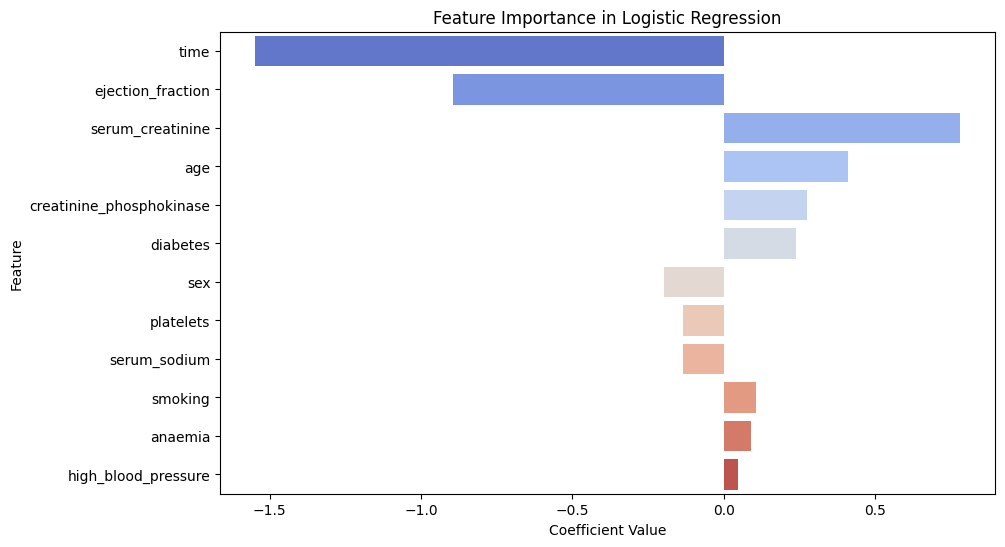

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df["Coefficient"], y=coef_df["Feature"], hue=coef_df["Feature"], palette="coolwarm")
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

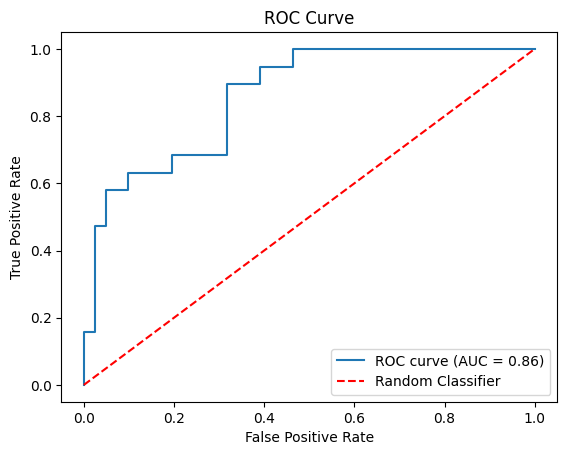

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# auc = area under curve, the higher the auc the better the model, the higher the true positive rate more of the time

# Probabilities that x-test observation are in the positive/death_event = 1 class
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# False positive rate (fpr), true positive rate (tpr), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
# Diagonal random coin-flip line
plt.plot([0, 1], [0, 1], linestyle='--', color = 'red', label = 'Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

ROC Curve: That the curve increases very quickly to 1.0 on the True Positive Rate axis means that this model produces much more true positives than false positives. A curve that is completely linear (i.e. it looks like it has a slope of +1) would produce as many true positives as false positives (i.e. random).